<a href="https://colab.research.google.com/github/sepaloscodigos/symmetrical-eureka/blob/main/LogisticRegressionAndPerceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Logistic Regression

In [ ]:
import numpy as np
import math
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Load the Breast Cancer Wisconsin dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [ ]:
# TODO: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=42)

In [ ]:
# Normalize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Implement Logistic Regression algorithm

# TODO: Implement the sigmoid function. Refer to the formula in the homework4.docx file
def sigmoid(z):
    # make sure to use the z variable in the formula
    formula = 1 / (1 + (math.e ** (-z)))
    return formula

def logistic_regression(X, y, learning_rate, num_iterations):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0

    # we need to update the weights and bias using gradient descent. Complete the code below
    for i in range(num_iterations):
        # TODO: combine the inputs and weights together, and then add bias. Assign this value to z
        z = np.matmul(X, weights.T) + bias

        # TODO: need to output probabilities betwen 0 and 1 (HINT: use the sigmoid function)
        y_predicted = sigmoid(z)

        # Compute the gradients

        # TODO: dw is the gradient of the loss function w.r.t. the weights
        dw = (1 / n_samples) * np.dot((y_predicted - y), X)

        # TODO: db is the gradient of the loss function w.r.t. the bias
        db = (1 / n_samples) * np.sum(y_predicted - y)

        # TODO: update the weights and bias using the computed gradients (HINT: use the learning rate)
        weights -= learning_rate * dw
        bias -= learning_rate * db

    return weights, bias


In [ ]:
# Train Logistic Regression model
# TODO: Find good values for learning_rate and num_iterations
learning_rate = 0.1
num_iterations = 20
weights, bias = logistic_regression(X_train_scaled, y_train, learning_rate, num_iterations)

# Predict class labels using trained model
def predict(X, weights, bias):
    z = np.dot(X, weights) + bias
    y_predicted = sigmoid(z)
    y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
    return y_predicted_cls

In [ ]:
y_pred = predict(X_test_scaled, weights, bias)

# Evaluate the model's performance
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
acc = np.mean(y_pred == y_test)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", acc)

Precision: 0.9857142857142858
Recall: 0.971830985915493
F1 Score: 0.9787234042553191
Accuracy: 0.9736842105263158


# Part 2: Perceptron

Ensure that PyTorch is installed before this section, as we will utilize this powerful library. For installation, check this link - [https://pytorch.org/get-started/locally/](https://pytorch.org/get-started/locally/)

In [ ]:
!pip3 install torch torchvision --index-url https://download.pytorch.org/whl/cu126

Looking in indexes: https://download.pytorch.org/whl/cu126


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import torch

In [ ]:
# TODO: Concatenate 1's to the X_train_scaled and X_test_scaled from above
# Hint: You'll probably want to use the numpy concatenate operation
X_train_ones = np.ones((455, 1))
X_test_ones = np.ones((114, 1))
X_train_wones = np.concatenate((X_train_scaled, X_train_ones), axis=1)
X_test_wones = np.concatenate((X_test_scaled, X_test_ones), axis=1)

In [ ]:
# TODO: Define the Perceptron class including an __init__ function and a forward function
class Perceptron():
    # TODO: initialze the weight vector w
    def __init__(self, input_size):
        self.weights = np.zeros((1, input_size))

    # TODO: classify a single example x using sgn(𝐰^T x + b)
    # Hint: make sure the output labels are correct
    def forward(self, x):
        y_pred = np.dot(self.weights, x)
        if y_pred > 0:
          return 1
        if y_pred < 0:
          return 0

    # Implement the perceptron learning algorithm from slides
    def update(self, x, y, learning_rate):
        y_pred = self.forward(x)
        if (y != y_pred):
          if (y == 1):
            self.weights += (learning_rate * x)
          if (y == -1):
            self.weights -= (learning_rate * x)

In [ ]:
# Train the model
# TODO: Find good values for learning_rate and num_iterations
learning_rate = 0.1
num_iterations = 20
input_size = X_train_wones.shape[1] # Note this is the input size with the 1's trick
perceptron = Perceptron(input_size)
for _ in range(num_iterations):
  for x_i, y_i in zip(X_train_wones, y_train):
    perceptron.update(x_i, y_i, learning_rate)

In [ ]:
# Evaluate the model
# Should get around 95% accuracy
correct_count = 0
for x_i, y_i in zip(X_test_wones, y_test):
  y_pred = perceptron.forward(x_i)
  correct = (y_pred == y_i)
  if correct:
    correct_count += 1
accuracy = float(correct_count) / len(y_test)
print("Test accuracy: %f" % accuracy)

Test accuracy: 0.956140


# Part 3: Data Preperation

In [ ]:
# First, make sure the values of X_train, X_test, y_train, y_test are set correctly from Assignment 1 and not overwritten
# If necessary, go back and rerun the original cell to make sure you have those correct values
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[9.029e+00 1.733e+01 5.879e+01 ... 1.750e-01 4.228e-01 1.175e-01]
 [2.109e+01 2.657e+01 1.427e+02 ... 2.903e-01 4.098e-01 1.284e-01]
 [9.173e+00 1.386e+01 5.920e+01 ... 5.087e-02 3.282e-01 8.490e-02]
 ...
 [1.429e+01 1.682e+01 9.030e+01 ... 3.333e-02 2.458e-01 6.120e-02]
 [1.398e+01 1.962e+01 9.112e+01 ... 1.827e-01 3.179e-01 1.055e-01]
 [1.218e+01 2.052e+01 7.722e+01 ... 7.431e-02 2.694e-01 6.878e-02]]
[[1.247e+01 1.860e+01 8.109e+01 ... 1.015e-01 3.014e-01 8.750e-02]
 [1.894e+01 2.131e+01 1.236e+02 ... 1.789e-01 2.551e-01 6.589e-02]
 [1.546e+01 1.948e+01 1.017e+02 ... 1.514e-01 2.837e-01 8.019e-02]
 ...
 [1.152e+01 1.493e+01 7.387e+01 ... 9.608e-02 2.664e-01 7.809e-02]
 [1.422e+01 2.785e+01 9.255e+01 ... 8.219e-02 1.890e-01 7.796e-02]
 [2.073e+01 3.112e+01 1.357e+02 ... 1.659e-01 2.868e-01 8.218e-02]]
[1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0
 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1
 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0

In [ ]:
# TODO: Rewrite the logistic regression code to include test evals at every n iterations
# Should now return test accuracy every n iterations
def logistic_regression_with_eval(X, y, X_test, y_test, learning_rate, num_iterations, eval_every=1):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    train_acc_all = []
    test_acc_all = []

    # Fill in with old solution
    for i in range(num_iterations):
        # Add your code from above
        # TODO: combine the inputs and weights together, and then add bias. Assign this value to z
        z = np.matmul(X, weights.T) + bias

        # TODO: need to output probabilities betwen 0 and 1 (HINT: use the sigmoid function)
        y_predicted = sigmoid(z)

        # Compute the gradients

        # TODO: dw is the gradient of the loss function w.r.t. the weights
        dw = (1 / n_samples) * np.dot((y_predicted - y), X)

        # TODO: db is the gradient of the loss function w.r.t. the bias
        db = (1 / n_samples) * np.sum(y_predicted - y)

        # TODO: update the weights and bias using the computed gradients (HINT: use the learning rate)
        weights -= learning_rate * dw
        bias -= learning_rate * db

        # Add new code here THIS IS NOT RIGHT
        if i % eval_every == 0:
          y_train_pred = predict(X, weights, bias)
          y_test_pred = predict(X_test, weights, bias)

          train_acc = np.mean(y_train_pred == y)
          test_acc = np.mean(y_test_pred == y_test)

          train_acc_all.append(train_acc)
          test_acc_all.append(test_acc)

    return weights, bias, train_acc_all, test_acc_all

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Take your solution from above and plot the train and test curves
# TODO: Copy hyperparamers from your solution above
learning_rate = 0.1
num_iterations = 20
weights_scaled, bias_scaled, train_acc_scaled, test_acc_scaled = logistic_regression_with_eval(
    X_train_scaled, y_train, X_test_scaled, y_test, learning_rate, num_iterations, eval_every=1)

# Make sure you get the same values as before
y_pred = predict(X_test_scaled, weights, bias)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
acc = np.mean(y_pred == y_test)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", acc)

Precision: 0.9857142857142858
Recall: 0.971830985915493
F1 Score: 0.9787234042553191
Accuracy: 0.9736842105263158


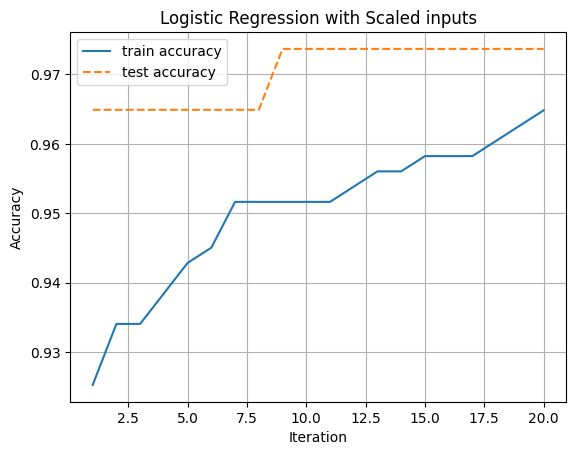

In [ ]:
# TODO:
# Using Matplotlib, make a plot with #iterations on the x axis and train and test accuracy on the y_axis
# Recall, we asked you to make simple plots in HW1
plt.title('Logistic Regression with Scaled inputs')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.plot(np.arange(1, 21), train_acc_scaled, label="train accuracy", linestyle="-")
plt.plot(np.arange(1, 21), test_acc_scaled, label="test accuracy", linestyle="--")
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipython-input-558466477.py:6: RuntimeWarning: overflow encountered in power
  formula = 1 / (1 + (math.e ** (-z)))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Precision: 0.0
Recall: 0.0
F1 Score: 0.0
Accuracy: 0.37719298245614036


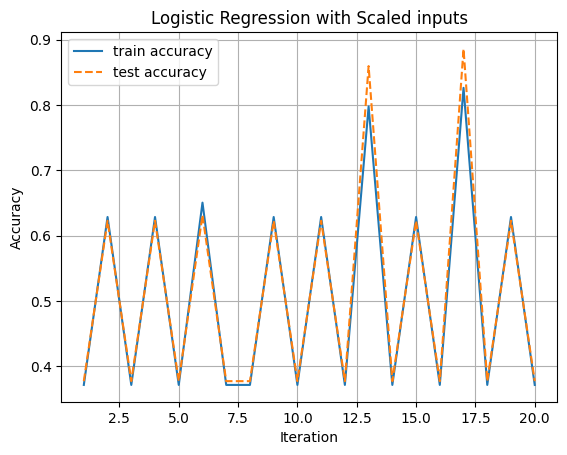

In [ ]:
# TODO - re-train and replot logistic regression without doing any input rescaling
# This should mostly be copying code from above but using the unscaled data
# TODO: Rewrite the logistic regression code to include test evals at every n iterations
# Should now return test accuracy every n iterations
def logistic_regression_with_eval(X, y, X_test, y_test, learning_rate, num_iterations, eval_every=1):
    n_samples, n_features = X.shape
    weights = np.zeros(n_features)
    bias = 0
    train_acc_all = []
    test_acc_all = []

    # Fill in with old solution
    for i in range(num_iterations):
        # Add your code from above
        # TODO: combine the inputs and weights together, and then add bias. Assign this value to z
        z = np.matmul(X, weights.T) + bias

        # TODO: need to output probabilities betwen 0 and 1 (HINT: use the sigmoid function)
        y_predicted = sigmoid(z)

        # Compute the gradients

        # TODO: dw is the gradient of the loss function w.r.t. the weights
        dw = (1 / n_samples) * np.dot((y_predicted - y), X)

        # TODO: db is the gradient of the loss function w.r.t. the bias
        db = (1 / n_samples) * np.sum(y_predicted - y)

        # TODO: update the weights and bias using the computed gradients (HINT: use the learning rate)
        weights -= learning_rate * dw
        bias -= learning_rate * db

        # Add new code here THIS IS NOT RIGHT
        if i % eval_every == 0:
          y_train_pred = predict(X, weights, bias)
          y_test_pred = predict(X_test, weights, bias)

          train_acc = np.mean(y_train_pred == y)
          test_acc = np.mean(y_test_pred == y_test)

          train_acc_all.append(train_acc)
          test_acc_all.append(test_acc)

    return weights, bias, train_acc_all, test_acc_all



learning_rate = 0.1
num_iterations = 20
weights, bias, train_acc, test_acc = logistic_regression_with_eval(
    X_train, y_train, X_test, y_test, learning_rate, num_iterations, eval_every=1)

y_pred = predict(X_test, weights, bias)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
acc = np.mean(y_pred == y_test)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", acc)


# TODO:
# Using Matplotlib, make a plot with #iterations on the x axis and train and test accuracy on the y_axis
# Recall, we asked you to make simple plots in HW1
plt.title('Logistic Regression with Scaled inputs')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.plot(np.arange(1, 21), train_acc, label="train accuracy", linestyle="-")
plt.plot(np.arange(1, 21), test_acc, label="test accuracy", linestyle="--")
plt.legend()
plt.grid(True)
plt.show()

What do you notice about the training curves and accuracy?

The accuracy has become very low. The training curves jump around a lot and do not show a trend of becoming better.

Examine the weights for both the scaled and unscaled logistic regression? What do you notice?

In [ ]:
# Compare weights
print("scaled weights: ", weights_scaled)
print("unscaled weights: ", weights)


scaled weights:  [-0.22156034 -0.15815489 -0.22219338 -0.21336763 -0.0939785  -0.12654144
 -0.17374503 -0.22582798 -0.07726393  0.05839408 -0.16053474  0.00632098
 -0.14762327 -0.15151545  0.02399225  0.00149261  0.01371201 -0.0559353
  0.02293258  0.06449934 -0.24392325 -0.1851822  -0.2402279  -0.22682372
 -0.14190227 -0.14857418 -0.17000793 -0.22995701 -0.14872994 -0.06422321]
unscaled weights:  [ 2.61282820e+00  5.03886470e+00  1.58437360e+01  5.29881285e+00
  2.85291832e-02  7.82041566e-03 -1.84605656e-02 -1.00131035e-02
  5.41205610e-02  2.18985319e-02  4.30839210e-03  4.16539747e-01
  1.71122240e-02 -7.70029360e+00  2.57087448e-03  4.49396495e-03
  4.92064717e-03  1.92180761e-03  7.01904165e-03  1.21332884e-03
  2.35707291e+00  6.29766690e+00  1.41288004e+01 -5.82318627e+01
  3.67803452e-02  4.91775880e-03 -2.81486505e-02 -6.87912276e-03
  7.55792530e-02  2.41025077e-02]


The scaled weights are small values, while the unscaled weights are either very large or extremely small.